# Matplotlib

* Introduction
* Plotting one curve
* Using NumPy
* Plotting multiple curves
* Plotting curves from file data
* Plotting points
* Plotting bar charts
* Horizontal bars
* Plotting multiple bar charts
* Plotting pie charts
* Plotting histograms
* Plotting boxplots
* Using custom colors for plots
* Controlling a line pattern
* Controlling a line thickness
* Controlling a fill pattern
* Controlling a marker's style
* Controlling a marker's size
* Adding a title
* Using LaTeX-style notations
* Adding a label to each axis
* Adding text
* Text alignment
* Text bounding box
* Adding arrows
* Adding a legend
* Adding a grid
* Adding lines
* Controlling tick spacing
* Controlling tick labeling
* Compositing multiple figures
* Setting an axis range
* Setting the aspect ratio
* Generating a PNG picture file
* Controlling the output resolution
* Generating PDF or SVG documents

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Introduction

matplotlib makes scientific plotting very straightforward. matplotlib is not the first attempt at making the plotting of graphs easy. What matplotlib brings is a modern solution to the balance between ease of use and power. matplotlib is a module for Python, a programming language. In this chapter, we will provide a quick overview of what using matplotlib feels like. Minimalistic recipes are used to introduce the principles matplotlib is built upon.

## Plotting one curve

Let's get started with one of the most common and basic graph that any plotting software offers: curves.

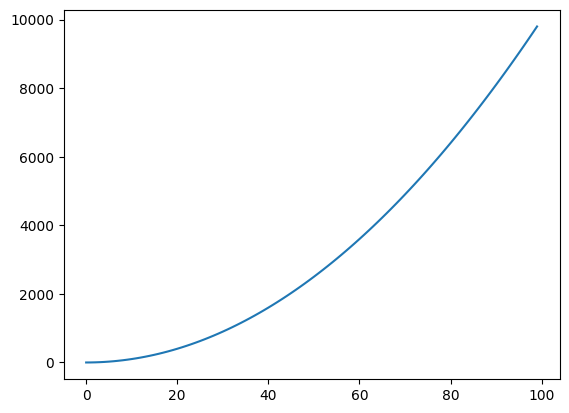

In [7]:
X = range(100)
Y = [value ** 2 for value in X]
plt.plot(X, Y)
plt.show()

[0, 4000, 8000]


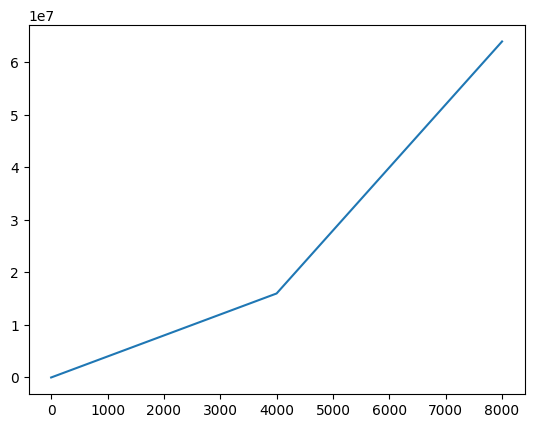

In [8]:
X = range(0,10000,4000)
Y = [value ** 2 for value in X]
print(list(X))
plt.plot(X, Y)
plt.show()

The third line plots a curve, where the x coordinates of the curve's points are given in the list X, and the y coordinates of the curve's points are given in the list Y. Note that the names of the lists can be anything you like.

The last line shows a result, which you will see on the window while running the script.

## Using NumPy

Let's plot another curve, **sin(x)**, with x in the [0, 2 * pi] interval. The only difference with the preceding script is the part where we generate the point coordinates.

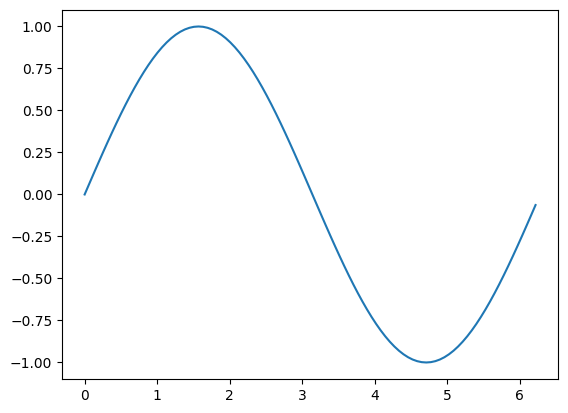

In [9]:
T = range(100)
X = [(2 * math.pi * t) / len(T) for t in T]
Y = [math.sin(value) for value in X]
plt.plot(X, Y)
plt.show()

Here is the NumPy version of the same example:

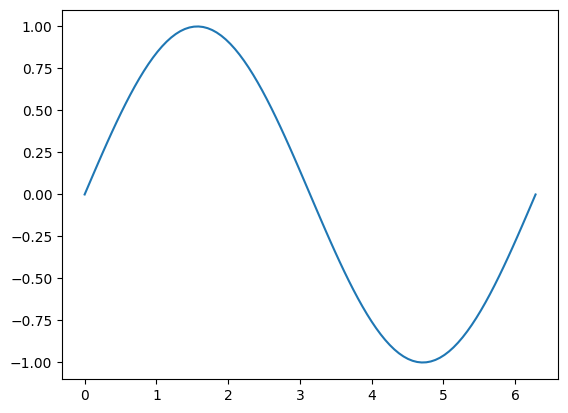

In [10]:
X = np.linspace(0, 2 * np.pi, 100)
Y = np.sin(X)
plt.plot(X, Y)
plt.show()

We have a shorter yet readable code for the NumPy version compared to the pure Python version.

NumPy can perform operations on whole arrays at once, saving us much work when generating curve coordinates. Moreover, using NumPy will most likely lead to much faster code than the pure Python equivalent. 

The following is an example where we plot the binomial $x^2-2x+1$ in the [-3,2] interval using 200 points:

In [11]:
X = np.linspace(-3, 2, 200)
Y = X**2 - 2*X + 1
plt.plot(X, Y)
plt.show()

Although matplotlib can be used without NumPy, the two make for a powerful combination.

## Plotting multiple curves

Let's show both **sin(x)** and **cos(x)** in the [0, 2pi] interval as follows:

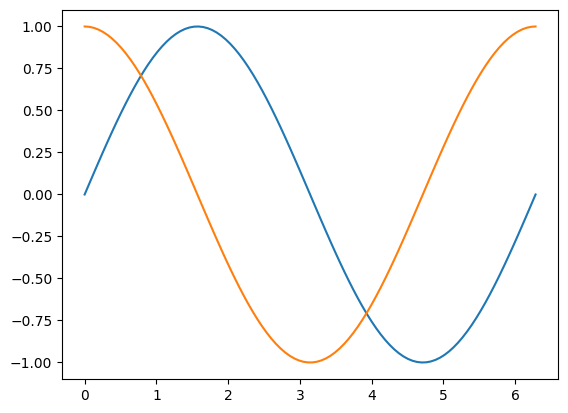

In [12]:
X = np.linspace(0, 2 * np.pi, 100)
Ya = np.sin(X)
Yb = np.cos(X)
plt.plot(X, Ya)
plt.plot(X, Yb)
plt.show()

The two curves show up with a **different color** automatically picked up by matplotlib.

We use one function call plt.plot() for one curve; thus, we have to call plt.plot() here twice. However, we still have to call plt.show() only once. The functions calls plt.plot(X, Ya) and plt.plot(X, Yb) can be seen as **declarations of intentions**. We want to link those two sets of points with a distinct curve for each.

matplotlib will simply keep note of this intention but will not plot anything yet. The **plt.show()** command, however, will signal that we want to plot what we have described so far.

This **deferred rendering mechanism** is central to matplotlib. You can declare what you render as and when it suits you. The graph will be rendered only when you call plt.show().

To illustrate this, let's look at the following script, which renders a bell-shaped curve, and the slope of that curve for each of its points:

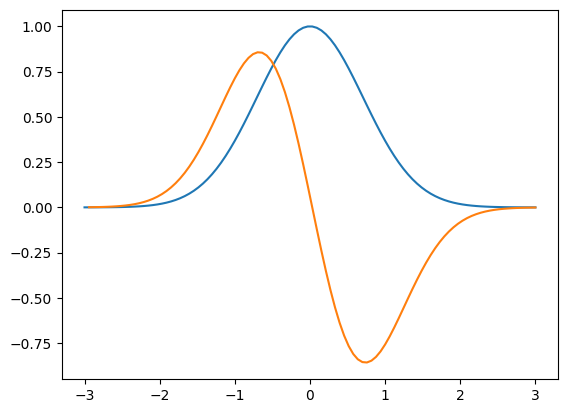

In [13]:
def plot_slope(X, Y):
    Xs = X[1:] - X[:-1]
    Ys = Y[1:] - Y[:-1]
    plt.plot(X[1:], Ys / Xs)
    
X = np.linspace(-3, 3, 100)
Y = np.exp(-X**2)
plt.plot(X, Y)
plot_slope(X, Y)
plt.show()

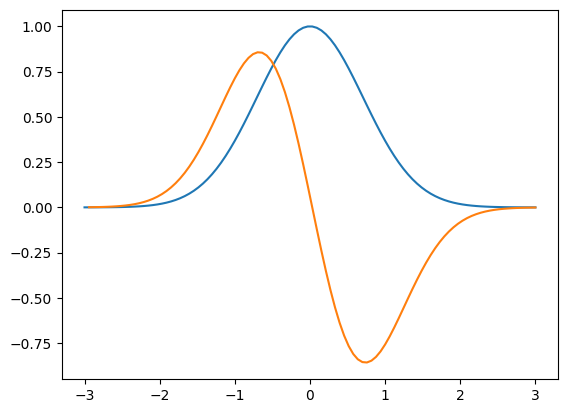

In [14]:
def plot_slope(X, Y):
    plt.plot(X[1:], np.diff(Y) / np.diff(X))
    
X = np.linspace(-3, 3, 100)
Y = np.exp(-X**2)
plt.plot(X, Y)
plot_slope(X, Y)
plt.show()

One of the function call, plt.plot(), is done inside the plot_slope function, which does
not have any influence on the rendering of the graph as plt.plot() simply declares what
we want to render, but does not execute the rendering yet. This is very useful when writing
scripts for complex graphics with a lot of curves. You can use all the features of a proper
programming language—loop, function calls, and so on— to compose a graph.

## Plotting curves from file data

Let's assume that we have time series stored in a plain text file named matplotlib_data_1.txt as follows:

```
0 0
1 1
2 4
4 16
5 25
6 36
```

A minimalistic pure Python approach to read and plot that data would go as follows:

In [15]:
X, Y = [], []

for line in open('data/matplotlib_data_1.txt', 'r'):
    values = [float(s) for s in line.split()]
    X.append(values[0])
    Y.append(values[1])
    
X, Y

([0.0, 1.0, 2.0, 4.0, 5.0, 6.0], [0.0, 1.0, 4.0, 16.0, 25.0, 36.0])

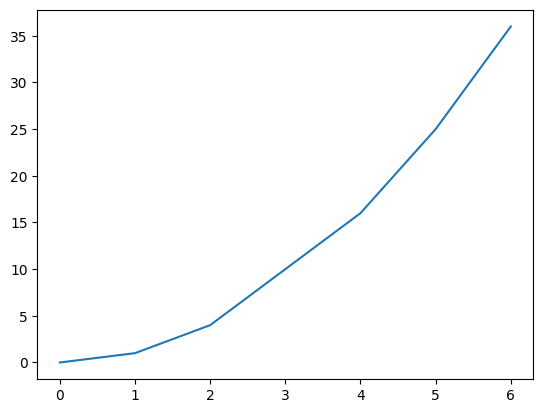

In [16]:
plt.plot(X, Y)
plt.show()

The following equivalent one-liner to read a text file may bring a smile to those more familiar with Python:

(0.0, 1.0, 2.0, 4.0, 5.0, 6.0)
(0.0, 1.0, 4.0, 16.0, 25.0, 36.0)


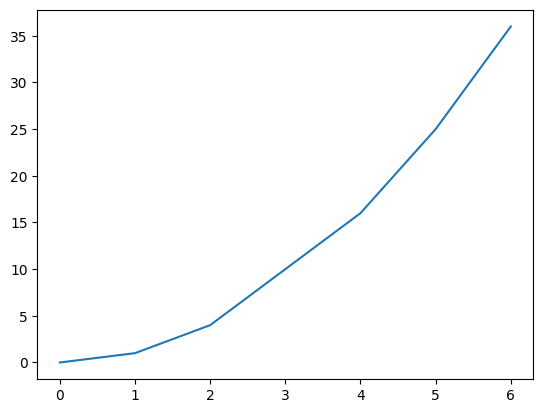

In [20]:
with open('data/matplotlib_data_1.txt', 'r') as f:
    X, Y = zip(*[[float(s) for s in line.split()] for line in f])

print(X)
print(Y)
plt.plot(X, Y)
plt.show()

In [19]:
with open('data/matplotlib_data_1.txt', 'r') as f:
    print([[float(s) for s in line.split()] for line in f])

[[0.0, 0.0], [1.0, 1.0], [2.0, 4.0], [4.0, 16.0], [5.0, 25.0], [6.0, 36.0]]


P.S. Check zip function and "Unpacking Argument Lists" in order to understan the code above.

In our data loading code, note that there is no serious checking or error handling going on. In any case, one might remember that a good programmer is a lazy programmer. Indeed, since NumPy is so often used with matplotlib, why not use it here?

In [21]:
data = np.loadtxt('data/matplotlib_data_1.txt')
data

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 4., 16.],
       [ 5., 25.],
       [ 6., 36.]])

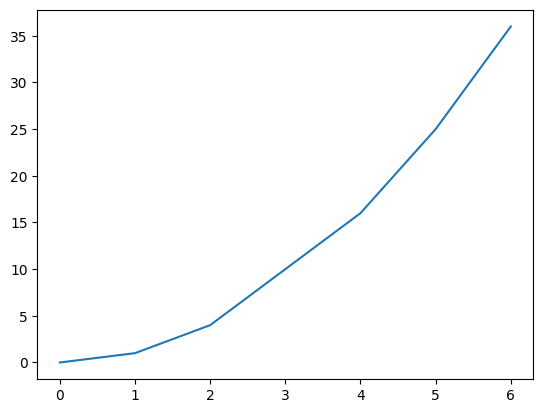

In [22]:
plt.plot(data[:,0], data[:,1])
plt.show()

This is as short as the one-liner shown in the preceding section, yet easier to read, and it will handle many error cases that our pure Python code does not handle. The following point describes the preceding script:

* The numpy.loadtxt() function reads a text file and returns a 2D array. With NumPy, 2D arrays are not a list of lists, they are true, full-blown matrices.

* The variable data is a NumPy 2D array, which give us the benefit of being able to manipulate rows and columns of a matrix as a 1D array. Indeed, in the line plot(data[:,0], data[:,1]), we give the first column of data as x coordinates and the second column of data as y coordinates.

Along with making the code shorter and simpler, using NumPy brings additional advantages. For large files, using NumPy will be noticeably faster (the NumPy module is mostly written in C), and storing the whole dataset as a NumPy array can save memory as well. Finally, using NumPy allows you to support other common file formats (CSV and Matlab) for numerical data without much effort.

As a way to demonstrate all that we have seen so far, let's consider the following task. A file contains N columns of values, describing N–1 curves. The first column contains the x coordinates, the second column contains the y coordinates of the first curve, the third column contains the y coordinates of the second curve, and so on. We want to display those N–1 curves.

The file my_data.txt should contain the following content:

```
0 0 6
1 1 5
2 4 4
4 16 3
5 25 2
6 36 1
```

We will do so by using the following code:

In [23]:
data = np.loadtxt('data/matplotlib_data_2.txt')
data

array([[ 0.,  0.,  6.],
       [ 1.,  1.,  5.],
       [ 2.,  4.,  4.],
       [ 4., 16.,  3.],
       [ 5., 25.,  2.],
       [ 6., 36.,  1.]])

In [24]:
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
plt.show()

In [25]:
data.T

array([[ 0.,  1.,  2.,  4.,  5.,  6.],
       [ 0.,  1.,  4., 16., 25., 36.],
       [ 6.,  5.,  4.,  3.,  2.,  1.]])

In [ ]:
for column in data.T[1:]:
    plt.plot(data[:,0], column)
    
plt.show()

We did the job with little effort by exploiting two tricks. In NumPy notation, data.T is a transposed view of the 2D array data — rows are seen as columns and columns are seen as rows. Also, we can iterate over the rows of a multidimensional array by doing for row in data. Thus, doing for column in data.T will iterate over the columns of an array. With a few lines of code, we have a fairly general plotting generic script.

## Plotting points

When displaying a curve, we implicitly assume that one point follows another — our data is the time series. Of course, this does not always have to be the case. One point of the data can be independent from the other. A simple way to represent such kind of data is to simply show the points without linking them.

The following script displays 1024 points whose coordinates are drawn randomly from the [0,1] interval:

In [26]:
data = np.random.rand(1024, 2)
data

array([[0.57169656, 0.35269072],
       [0.94357771, 0.98958894],
       [0.32124827, 0.52851512],
       ...,
       [0.68648062, 0.80116144],
       [0.81005234, 0.03408832],
       [0.92883635, 0.52288906]])

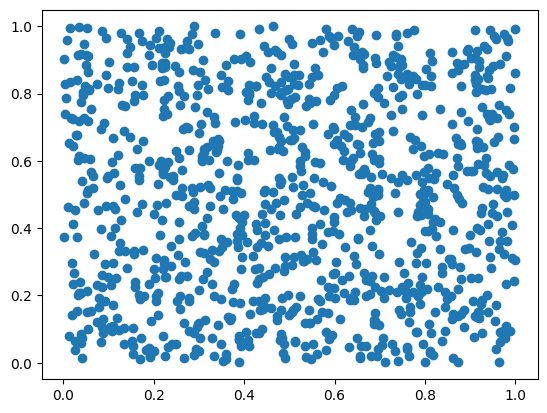

In [27]:
plt.scatter(data[:,0], data[:,1])
plt.show()

The function **plt.scatter()** works exactly like **plt.plot()**, taking the x and y coordinates of points as input parameters. However, each point is simply shown with one marker. Don't be fooled by this simplicity — plt.scatter() is a rich command. By playing with its many optional parameters, we can achieve many different effects.

## Plotting bar charts

Bar charts are a common staple of plotting package, and even matplotlib has them.

The dedicated function for bar charts is **pyplot.bar()**. We will enable this function by executing the following script:

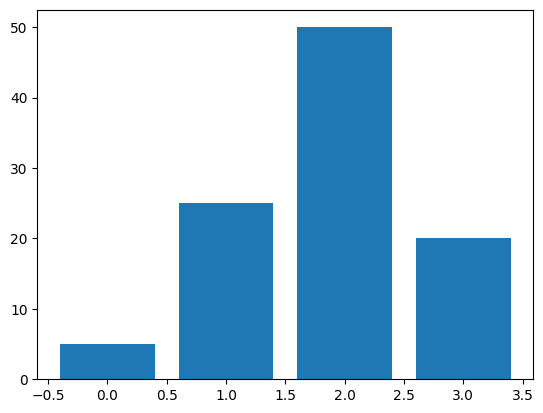

In [28]:
data = [5., 25., 50., 20.]
plt.bar(range(len(data)), data)
plt.show()

For each value in the list data, one vertical bar is shown. The **pyplot.bar()** function receives two arguments — the x coordinate for each bar and the height of each bar. Here, we use the coordinates 0, 1, 2, and so on, for each bar, which is the purpose of range(len(data)).

Through an optional parameter, pyplot.bar() provides a way to control the **bar's thickness**. Moreover, we can also obtain horizontal bars using the twin brother of pyplot.bar(), that is, **pyplot.barh()**.

## Horizontal bars

If you are more into horizontal bars, use the **barh()** function, which is the strict equivalent of **bar()**, apart from giving horizontal rather than vertical bars:

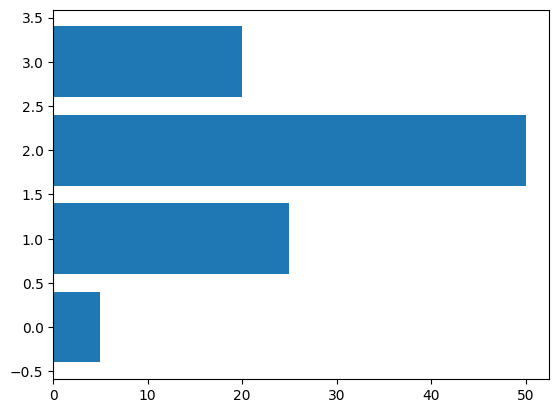

In [29]:
data = [5., 25., 50., 20.]
plt.barh(range(len(data)), data)
plt.show()

## Plotting multiple bar charts

When comparing several quantities and when changing one variable, we might want a bar chart where we have bars of one color for one quantity value.

We can plot multiple bar charts by playing with the thickness and the positions of the bars as follows:

In [30]:
data = [[5., 25., 50., 20.],
[4., 23., 51., 17.],
[6., 22., 52., 19.]]

X = np.arange(4)

plt.bar(X + 0.00, data[0], color='b', width=0.25)
plt.bar(X + 0.25, data[1], color='g', width=0.25)
plt.bar(X + 0.50, data[2], color='r', width=0.25)

plt.show()

The data variable contains three series of four values. The preceding script will show three bar charts of four bars. The bars will have a thickness of 0.25 units. Each bar chart will be shifted 0.25 units from the previous one. Color has been added for clarity. This topic will be detailed later in "Customizing the Color and Styles" section.

The code shown in the preceding section is quite tedious as we repeat ourselves by shifting the three bar charts manually. We can do this better by using the following code:

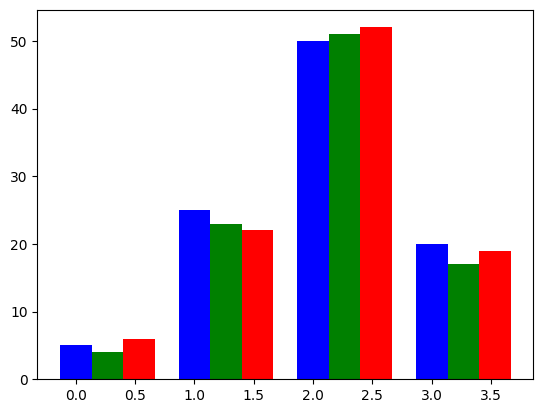

In [31]:
data = [[5., 25., 50., 20.],
[4., 23., 51., 17.],
[6., 22., 52., 19.]]

color_list = ['b', 'g', 'r']
gap = .8 / len(data)

for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i * gap, row, width=gap, color=color_list[i % len(color_list)])
    
plt.show()

Here, we iterate over each row of data with the loop for i, row in enumerate(data).
The iterator enumerate returns both the current row and its index. Generating the position
of each bar for one bar chart is done with a list comprehension. This script will produce
the same result as the previous script, but would not require any change if we add rows
or columns of data.

## Plotting pie charts

To compare the relative importance of quantities, nothing like a good old pie — pie chart, that is.

The dedicated pie-plotting function **pyplot.pie()** will do the job. We will use this function in the following code:

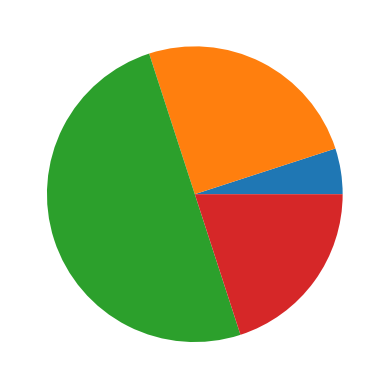

In [32]:
data = [5, 25, 50, 20]
plt.pie(data)
plt.show()

The **pyplot.pie()** function simply takes a list of values as the input. Note that the input data is a list; it could be a NumPy array. You do not have to adjust the data so that it adds up to 1 or 100. You just have to give values to matplolib and it will automatically compute the relative areas of the pie chart.

## Plotting histograms

Histograms are graphical representations of a probability distribution. In fact, a histogram is just a specific kind of a bar chart. We could easily use matplotlib's bar chart function and do some statistics to generate histograms. However, histograms are so useful that matplotlib provides a function just for them. In this recipe, we are going to see how to use this histogram function.

The following script draws 1000 values from a normal distribution and then generates histograms with 20 bins:

In [33]:
X = np.random.randn(100000)
X[:30]

array([-0.2973949 ,  0.20364882,  1.32621791,  0.05158745,  0.48072027,
       -0.04599736, -0.65584206,  0.55594842,  0.97655489,  1.21671458,
       -0.81595133, -0.9862581 , -0.16726458,  1.38323318, -0.06681382,
       -1.871642  , -0.74308322, -1.53720394,  0.38043635, -1.34474251,
       -0.74012323,  0.05483068, -0.32320204,  1.2624688 , -1.56144035,
       -0.77950211, -1.15041523,  1.41743822,  0.19469115,  1.11069747])

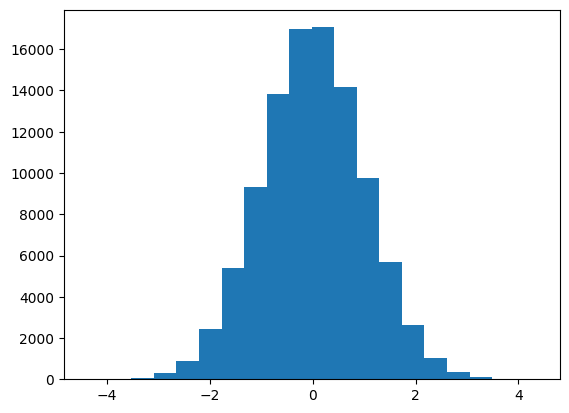

In [34]:
plt.hist(X, bins=20)
plt.show()

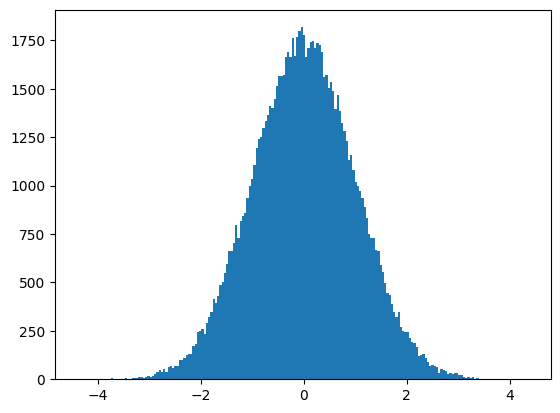

In [35]:
plt.hist(X, bins=200)
plt.show()

The histogram will change a bit each time we run the script as the dataset is randomly generated.
   
The **pyplot.hist()** function takes a list of values as the input. The range of the values will be divided into equal-sized bins (10 bins by default). The pyplot.hist() function will generate a bar chart, one bar for one bin. The height of one bar is the number of values following in the corresponding bin. The number of bins is determined by the optional parameter bins. By setting the optional parameter normed to True, the bar height is normalized and the sum of all bar heights is equal to 1.

## Plotting boxplots

Boxplot allows you to compare distributions of values by conveniently showing the median, quartiles, maximum, and minimum of a set of values.

The following script shows a boxplot for 100 random values drawn from a normal distribution:

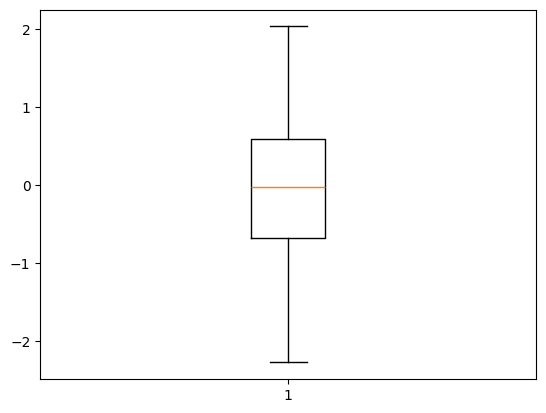

In [40]:
data = np.random.randn(100)
plt.boxplot(data)
plt.show()

A boxplot will appear that represents the samples we drew from the random distribution. Since the code uses a randomly generated dataset, the resulting figure will change slightly every time the script is run.

The plot.boxplot() function takes a set of values and computes the mean, median, and other statistical quantities on its own.
The following points describe the preceding boxplot:

* The red bar is the median of the distribution.
* The blue box includes 50 percent of the data from the lower quartile to the upper quartile. Thus, the box is centered on the median of the data.
* The lower whisker extends to the lowest value within 1.5 IQR from the lower quartile.
* The upper whisker extends to the highest value within 1.5 IQR from the upper quartile.
* Values further from the whiskers are shown with a cross marker.

To show more than one boxplot in a single graph, calling **pyplot.boxplot()** once for each boxplot is not going to work. It will simply draw the boxplots over each other, making a messy, unreadable graph. However, we can draw several boxplots with just one single call to pyplot.boxplot() as follows:

[[ 1.36988095  0.59341632 -1.37824491 -0.40107778 -0.04570125]
 [-0.73305547  0.5553846  -0.95882816 -0.05122213  0.20222331]]


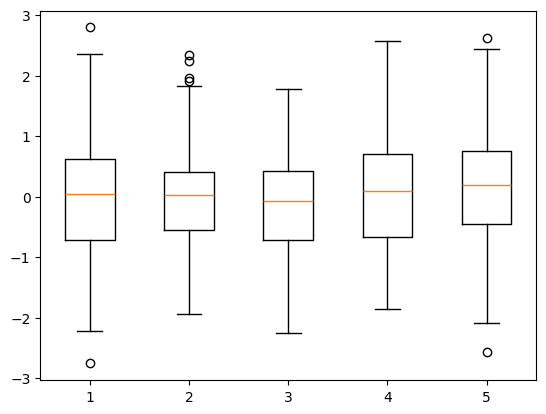

In [45]:
data = np.random.randn(100, 5)
print(data[:2])
plt.boxplot(data)
plt.show()

The pyplot.boxplot() function accepts a list of lists as the input, rendering a boxplot for each sublist.

## Using custom colors for plots

The default colors used by matplotlib are rather bland. We might have our own preferences of what convenient colors are. We might want to have figures that follow a predefined color scheme so that they fit well within a document or a web page. More pragmatically, we might simply have to make figures for a document that will be printed on a black-and-white printer. 

There are multiple ways to define colors in matplotlib. Some of them are as follows:

* **Triplets:** These colors can be described as a real value triplet—the red, blue, and green components of a color. The components have to be in the [0, 1] interval. Thus, the Python syntax (1.0, 0.0, 0.0) will code a pure, bright red, while (1.0, 0.0, 1.0) appears as a strong pink.

* **Quadruplets:** These work as triplets, and the fourth component defines a transparency value. This value should also be in the [0, 1] interval. When rendering a figure to a picture file, using transparent colors allows for making figures that blend with a background. This is especially useful when making figures that will slide or end up on a web page.

* **Predefined names:** matplotlib will interpret standard HTML color names as an actual color. For instance, the string red will be accepted as a color and will be interpreted as a bright red. A few colors have a one-letter alias, which is shown in the following table:


<img src="images/matplotlib_colors.webp">

* **HTML color strings:** matplotlib can interpret HTML color strings as actual colors. Such strings are defined as #RRGGBB where RR, GG, and BB are the 8-bit values for the red, green, and blue components in hexadecimal.

* **Gray-level strings:** matplotlib will interpret a string representation of a floating point value as a shade of gray, such as 0.75 for a medium light gray.

Setting the color of a curve plot is done by setting the parameter color (or the equivalent shortcut c) of the pyplot.plot() function as follows:

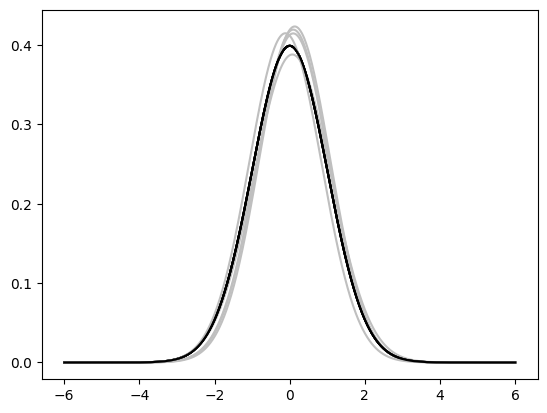

In [46]:

def pdf(X, mu, sigma):
    a = 1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma ** 2)
    return a * np.exp(b * (X - mu) ** 2)

X = np.linspace(-6, 6, 1000)

for i in range(5):
    samples = np.random.standard_normal(50)
    mu, sigma = np.mean(samples), np.std(samples)
    plt.plot(X, pdf(X, mu, sigma), color='.75')
    plt.plot(X, pdf(X, 0., 1.), color='k')
    
plt.show()

This graph displays five light gray, bell-shaped curves and a black one:
    
In this example, we generate five sets of 50 samples from a normal distribution. For each of the five sets, we plot the estimated probability density in light gray. The normal distribution probability density is shown in black. There, the color is coded using the shortcut for black, that is, k.

## Controlling a line pattern and thickness

When creating figures for black and white documents, we are limited to gray levels. In practice, three levels of gray are usually the most we can reasonably use. However, using different line patterns allows some diversity. In this recipe, we are going to see how to control line pattern and thickness.

As in the case of colors, the line style is controlled by an optional parameter of pyplot.plot() as shown in the following script:

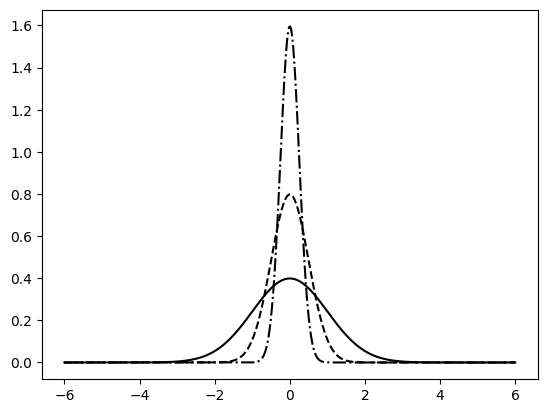

In [47]:
def pdf(X, mu, sigma):
    a = 1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma ** 2)
    return a * np.exp(b * (X - mu) ** 2)

X = np.linspace(-6, 6, 1024)

plt.plot(X, pdf(X, 0., 1.), color='k', linestyle='solid')
plt.plot(X, pdf(X, 0., .5), color='k', linestyle='dashed')
plt.plot(X, pdf(X, 0., .25), color='k', linestyle='dashdot')

plt.show()

In this example, we use the linestyle parameter of pyplot.plot() to control the line pattern of three different curves. The following line styles are available:

* Solid
* Dashed
* Dotted
* Dashdot

Line style settings are not limited to pyplot.plot(); in fact, any graphics made of lines allows such settings. Moreover, you can also control line thickness.

## Controlling a line thickness

Likewise, the **linewidth** parameter will change the thickness of lines. By default, the thickness is set to 1 unit. Playing with the thickness of lines can help to put emphasis on one particular curve. The following is the script to set the thickness of lines using the linewidth parameter:

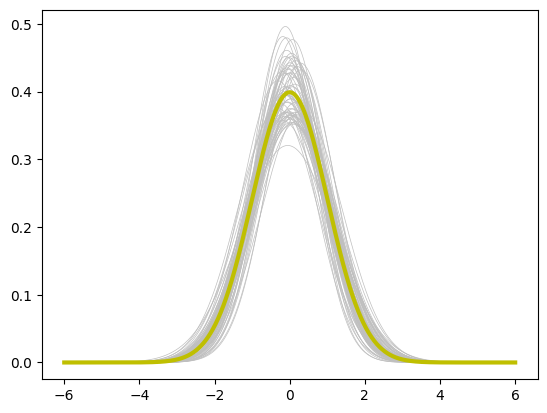

In [48]:
def pdf(X, mu, sigma):
    a = 1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma ** 2)
    return a * np.exp(b * (X - mu) ** 2)

X = np.linspace(-6, 6, 1024)

for i in range(64):
    samples = np.random.standard_normal(50)
    mu, sigma = np.mean(samples), np.std(samples)
    plt.plot(X, pdf(X, mu, sigma), color='.75', linewidth=.5)

plt.plot(X, pdf(X, 0., 1.), color='y', linewidth=3.)

plt.show()

The graph displays thin gray curves corresponding to 64 Gaussians PDF (Probability Density Functions) estimated from 50 samples. The Gaussian distribution used to draw the samples is shown as a thick yellow curve.

## Controlling a fill pattern

matplotlib offers fairly limited support to fill surfaces with a pattern. For line patterns, it can be helpful when preparing figures for black-and-white prints. In this recipe, we are going to look at how we can fill surfaces with a pattern.

Let's demonstrate the use of fill patterns with a bar chart as follows:

In [49]:
N = 8
A = np.random.random(N)
B = np.random.random(N)
X = np.arange(N)

plt.bar(X, A, color='w', hatch='x', linestyle='solid', edgecolor='black')
plt.bar(X, A + B, bottom=A, color='g', hatch='/', ls='solid', edgecolor='red')

plt.show()

Rendering function filling volumes, such as pyplot.bar(), accept an optional parameter, **hatch**. This parameter can take the following values:

* /
* \
* |
* -
* +
* x
* o
* O
* .
* *

Each value corresponds to a different hatching pattern. 

## Controlling a marker's style

Previously, we have seen how we can display the points of a curve as dots. Also, scatter plots represent each point of a dataset. As it turns out, matplotlib offers a variety of shapes to replace dots with other kinds of markers. In this recipe, we are going to see how to set a marker's style.

Markers can be specified in various ways as follows:

* **Predefined markers:** They can be predefined shapes, represented as a number in the [0, 8] range, or some strings
* **Vertices list:** This is a list of value pairs, used as coordinates for the path of a shape
* **Regular polygon:** It represents a triplet (N, 0, angle) for an N sided regular polygon, with a rotation of angle degrees
* **Star polygon:** It represents a triplet (N, 1, angle) for an N sided regular star, with a rotation of angle degrees

Let's take a script that shows two sets of points with two different colors. Now we will display all the points in black, but with different markers as follows:

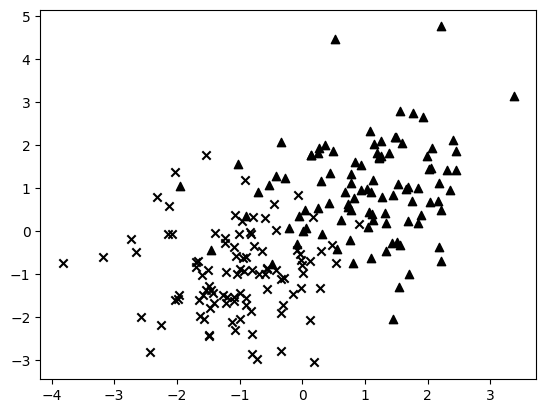

In [50]:
A = np.random.standard_normal((100, 2))
A += np.array((-1, -1))
B = np.random.standard_normal((100, 2))
B += np.array((1, 1))

plt.scatter(A[:,0], A[:,1], color='k', marker='x')
plt.scatter(B[:,0], B[:,1], color='k', marker='^')

plt.show()

Two Gaussian clouds of dots appear, each using a different marker. 

In this script, we set the color of both scatter plots to black. Using the marker parameter, we specify a different marker for each set.

Unlike the color parameter, the marker parameter does not accept a list of marker specifications as inputs. Thus, we cannot use one single call to pyplot.scatter() to display several set of points with different markers. We need to segregate points per
type of marker and use a separate call to pyplot.scatter() for each set as follows:

[[5.1 3.5 1.4 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [4.8 3.  1.4 0.3 0. ]
 [5.  2.  3.5 1.  1. ]
 [6.6 3.  4.4 1.4 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [7.6 3.  6.6 2.1 2. ]
 [6.9 3.2 5.7 2.3 2. ]
 [7.7 3.  6.1 2.3 2. ]]


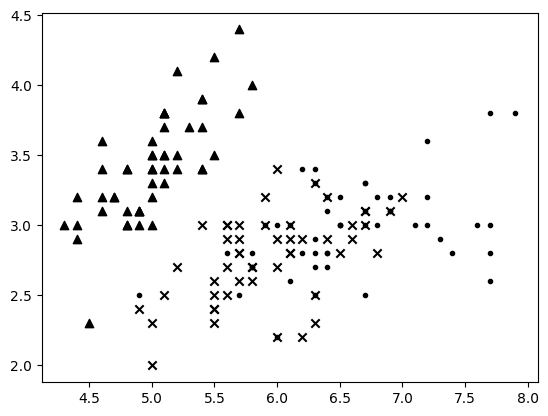

In [56]:
label_list = (b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica',)

def read_label(label):
    return label_list.index(label)

data = np.loadtxt('data/iris.data.txt', delimiter=',', converters={ 4:read_label })
print(data[::15])
marker_set = ('^', 'x', '.')

for i, marker in enumerate(marker_set):
    data_subset = np.asarray([x for x in data if x[4] == i])
    plt.scatter(data_subset[:,0], data_subset[:,1], color='k', marker=marker)
    
plt.show()

Each cluster from the dataset appears with its own marker as shown in the graph.

This example is similar to the previous example where we load a dataset and display each point according to the label. Here, however, we segregate points per label. Then, we iterate through each entry of the map and call pyplot.scatter() for each subset of points. 

The marker style is also accessible for pyplot.plot() using the same marker parameter. Using one marker for each data point can be a problem as it will display more points than we want to. The **markevery** parameter allows you to display only one marker for every N points as shown in the following script:

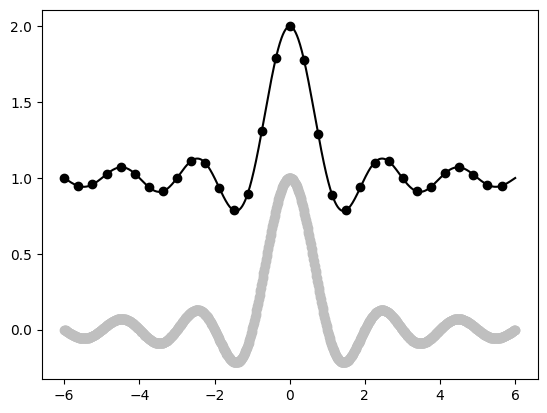

In [57]:
X = np.linspace(-6, 6, 1024)
Y1 = np.sinc(X)
Y2 = np.sinc(X) + 1

plt.plot(X, Y1, marker='o', color='.75')
plt.plot(X, Y2, marker='o', color='k', markevery=32)

plt.show()

## Controlling a marker's size

As seen in the previous recipe, we can control the style of markers; controlling their size also works along the same lines. In this recipe, we are going to see how to control marker sizes.

A marker's size is controlled in the same way as other marker attributes, with a dedicated optional parameter as shown in the following script:

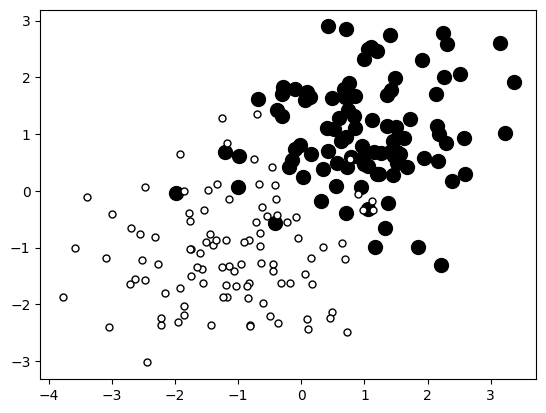

In [58]:
A = np.random.standard_normal((100, 2))
A += np.array((-1, -1))
B = np.random.standard_normal((100, 2))
B += np.array((1, 1))

plt.scatter(B[:,0], B[:,1], c='k', s=100.)
plt.scatter(A[:,0], A[:,1], c='w', edgecolor='black', s=25.)

plt.show()

In this example, we display two sets of points of different sizes. The marker's size is set by the parameter **s** for pyplot.scatter(). Oddly enough, it sets the surface area of a marker and not its radius.

Because the sizes are the actual surface areas and not the radii, they follow a quadratic progression — the markers that are four times larger will have radii that are two times larger.

The pyplot.scatter() function also takes a list as an input for the s parameter — one size for each point as shown in the following script:

In [ ]:
M = np.random.standard_normal((1000, 2))
R = np.sum(M ** 2, axis=1)

plt.scatter(M[:, 0], M[:, 1], c = 'w', edgecolor='black', marker='s', s=32.*R)

plt.show()

In this script, we drew random points according to a bivariate Gaussian distribution. The radius of a point depends on its distance from the origin.

## Adding a title

Let's start with something simple: adding a title to a graphic. The following code will add a title to the figure:

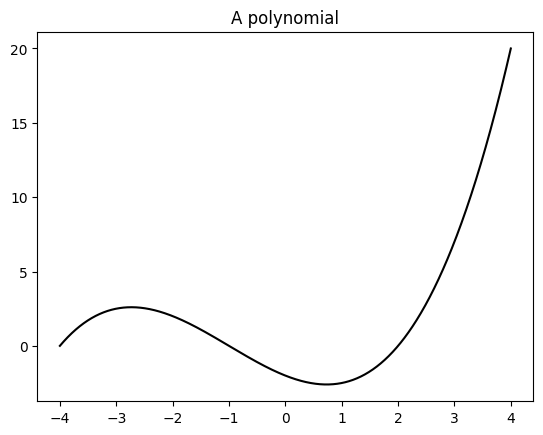

In [59]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)


plt.title('A polynomial')
plt.plot(X, Y, c = 'k')
plt.show()

Here, we render a simple curve and add a title to the figure, which appears at the top of the figure. It's simply done with the **pyplot.title()** function, which takes one string as a parameter and sets the title for the whole figure.

## Using LaTeX-style notations

We can now annotate figures. However, in a scientific and engineering context, the solution demonstrated previously suffers from one annoying limitation. We cannot use mathematical notations! Or, can we? In this recipe, we are going to see how to use LaTeX to display mathematical scripts in a figure.

You need a working LaTeX setup installed on your computer so that matplotlib can interpret a LaTeX-style notation to render mathematical text. Fall short of this, and you will not be able to try this recipe. You can find useful explanations on installing LaTeX on the LaTeX Wikibook (http://en.wikibooks.org/wiki/LaTeX/Installation).

LaTeX is a document preparation system widely used in academia. Unlike document editors such as Microsoft Word or LibreOffice Writer, a LaTeX user cannot see how the final document will look while editing it. Documents are described as a mix of text and commands stored in a plain text file. Then, LaTeX will interpret the document description to render a document. LaTeX is a fairly large environment. LaTeX has a specific language to describe mathematical text. This language is so popular that it became a de facto standard to simply write formulae rather than render them. For instance, in the science and engineering community, LaTeX's formula language is commonly used to write mathematical text in e-mails and forums.

Rendering some text with LaTeX is surprisingly simple:

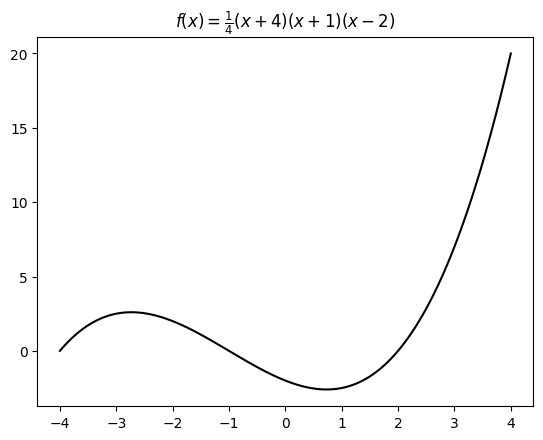

In [60]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

plt.title('$f(x)=\\frac{1}{4}(x+4)(x+1)(x-2)$')
plt.plot(X, Y, c = 'k')

plt.show()

This script does exactly what we did in the previous recipe: it shows a figure with a title at the top. The only difference with the usual way to set a title is the string given to pyplot.title(). The string starts and ends with the $ character; this is to signal matplotlib to interpret and render the text as a LaTeX-style mathematical text. Then, the string content is just the standard LaTeX language for the mathematical text.

The LaTeX language relies heavily on the escape character, \, which also happens to be the string escape character for Python. Thus, where you would use one \ character in a LaTeX text, put two in your Python string. To avoid fumbling with escape characters, you can prefix your string with r and you won't need any escape characters.

You don't know the LaTeX language for mathematical text? No worries, you can learn it quickly! In the matplotlib context, you can find the definitive guide at http://matplotlib.org/users/mathtext.html. A fairly complete tutorial can be found at http://en.wikibooks.org/wiki/LaTeX/Mathematics.

This LaTeX-notation feature is not limited to titles; it can be used for any annotation. Here,
we simply demonstrate this on the title text.

## Adding a label to each axis

After a title, a proper description of the figure's axis helps a great deal for users understand a graphic. In this recipe, we will show you how to get a label next to each axis of a figure.

Adding such annotations is very simple, as demonstrated in the following example:

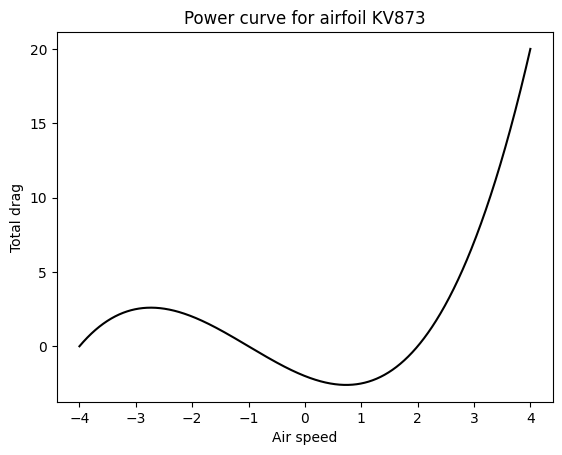

In [61]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

plt.title('Power curve for airfoil KV873')
plt.xlabel('Air speed')
plt.ylabel('Total drag')
plt.plot(X, Y, c = 'k')
plt.show()

The figure will be the same as the one obtained in the first recipe of this chapter. However, both the axes will feature a legend.

We use the **pyplot.xlabel()** and **pyplot.ylabel()** functions to add a description of the horizontal axis and the vertical axis, respectively. As for the pyplot.title() function, this function accepts the LaTeX notation. These functions are available for any kind of graphic; you would use the same functions to annotate a scatter plot, a histogram, and so on.

## Adding text

So far, we have seen how to set text at preset locations, such as title and axes. In this recipe, we are going to see how to add text at any location using text boxes.

matplotlib has a very flexible function called **pyplot.text()**, that displays text:

In [62]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

plt.text(-0.5, -0.25, 'Brackmard minimum')
plt.plot(X, Y, c = 'k')
plt.show()

We use the **pyplot.text()** function that takes a position and the text to display. The position is given in the graphic coordinates, specifying the position of the left border and the vertical baseline of the text.

matplotlib's text rendering is very flexible. Let's explore the important options available.

## Text alignment

The text is bound by a box. This box is used to relatively align the text to the coordinates passed to pyplot.text(). Using the **verticalalignment** and **horizontalalignment** parameters (respective shortcut equivalents are va and ha), we can control how the alignment is done.

The vertical alignment options are as follows:

* **'center':** This is relative to the center of the textbox
* **'top':** This is relative to the upper side of the textbox
* **'bottom':** This is relative to the lower side of the textbox
* **'baseline':** This is relative to the text's baseline


<img src="img/2/1/5.JPG">

The horizontal alignment options are as follows:

* **'center':** This is relative to the center of the textbox
* **'left':** This is relative to the left side of the textbox
* **'right':** This is relative to the right-hand side of the textbox

<img src="img/2/1/6.JPG">

## Text bounding box

The pyplot.text() function supports a **bbox** parameter that takes a dictionary as the input. This dictionary defines the various settings for the text box. Here's an illustration:

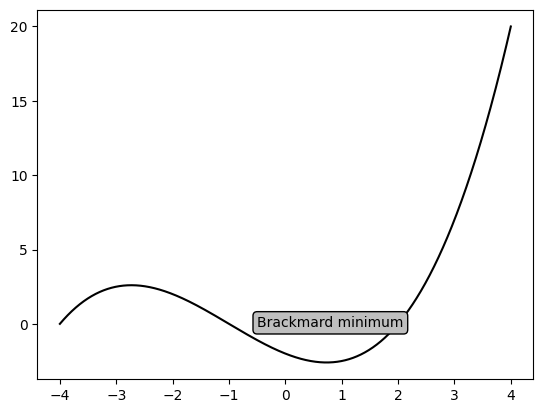

In [63]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

box = {'facecolor': '.75', 'edgecolor': 'k', 'boxstyle': 'round'}

plt.text(-0.5, -0.20, 'Brackmard minimum', bbox=box)
plt.plot(X, Y, c='k')
plt.show()

The dictionary passed to the bbox parameter defines the following key-value pairs:

* **'facecolor':** This is the color used for the box. It will be used to set the background and the edge color

* **'edgecolor':** This is the color used for the edges of the box's shape

* **'alpha':** This is 
used to set the transparency level so that the box blends with the background

* **'boxstyle':** This sets the style of the box, which can either be 'round' or 'square'

* **'pad':** If 'boxstyle' is set to 'square', it defines the amount of padding between the text and the box's sides

## Adding arrows

Adding text boxes can help you to annotate a figure. However, to show a specific part of a picture, nothing beats the use of an arrow. In this recipe, we will show you how to add arrows on a figure.

matplotlib has a function to draw arrows with the pyplot.annotate() function as shown in the following code snippet:

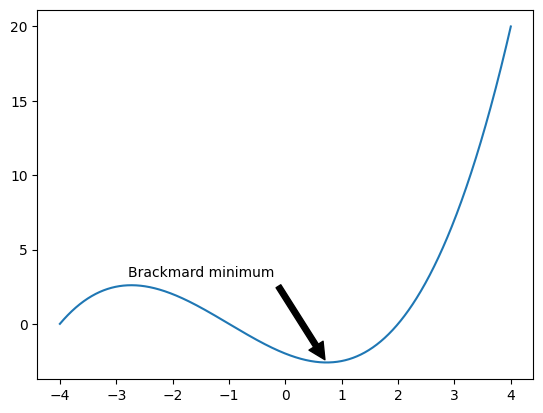

In [64]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

plt.annotate('Brackmard minimum', ha='center', va='bottom', xytext=(-1.5, 3.), xy=(0.75, -2.7),
    arrowprops={ 'facecolor': 'black', 'shrink': 0.05})

plt.plot(X, Y)
plt.show()

The pyplot.annotate() function shows text working on the same lines as pyplot.text(). However, an arrow is also rendered. The text to be displayed is the first parameter. The **xy** parameter specifies the arrow's destination. The **xytext** parameter specifies the text position. Similar to pyplot.text(), one can play with the text alignment through the **horizontalalignment** and **verticalalignment** parameters. The **shrink** parameter controls the gap between the arrow's endpoints and the arrow itself.

The aspect of the arrow is controlled by a dictionary passed to the arrowprops parameter:

* **'arrowstyle':** The parameters "<-", "<", "-", "wedge", "simple", and "fancy" control the style of the arrow
* **'facecolor':** This is the color used for the arrow. It will be used to set the background and the edge color
* **'edgecolor':** This is the color used for the edges of the arrow's shape
* **'alpha':** This is used to set the transparency level so that the arrow blends with the background


<img src="img/2/1/9.JPG">

## Adding a legend

A proper figure is not complete without its own legend. matplotlib provides a way to generate a legend with the minimal amount of effort. In this recipe, we will see how to add a legend to a graph.

For this recipe, we use the **pyplot.legend()** function as well as the label optional parameter:

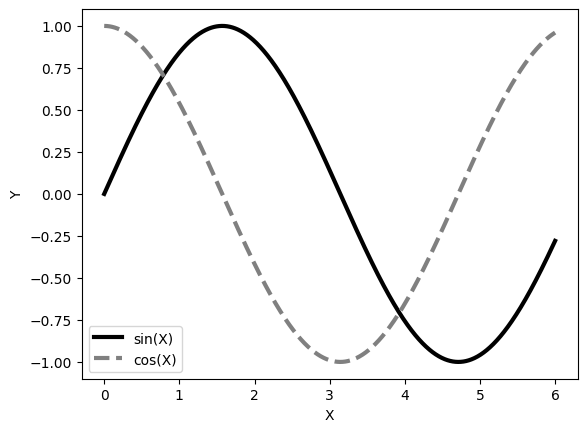

In [65]:
X = np.linspace(0, 6, 1024)
Y1 = np.sin(X)
Y2 = np.cos(X)

plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, Y1, c='k', lw=3., label='sin(X)')
plt.plot(X, Y2, c='.5', lw=3., ls='--', label='cos(X)')
plt.legend()
plt.show()

Each pyplot function has an optional label parameter to name an element, such as curve, histogram, and so on, of a figure. matplotlib keeps a track of these labels. The pyplot. **legend()** function will render a legend. The legend is automatically generated from the labels.

The pyplot.legend function has a couple of interesting parameters to control the legend aspects:

* **'loc':** This is the location of the legend. The default value is 'best', which will place it automatically. Other valid values are 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', and 'center'.
* **'shadow':** This can be either True or False, and it renders the legend with a shadow effect.
* **'fancybox':** This can be either True or False and renders the legend with a rounded box.
* **'title':** This renders the legend with the title passed as a parameter.
* **'ncol':** This forces the passed value to be the number of columns for the legend.

## Adding a grid

When preparing graphics, we might need to have a quick guess of the coordinates of any part of a figure. Adding a grid to the figure is a natural way to improve the readability of a figure. In this recipe, we are going to see how to add a grid to a figure.

matplotlib's grid functionality is controlled with the **pyplot.grid()** function.

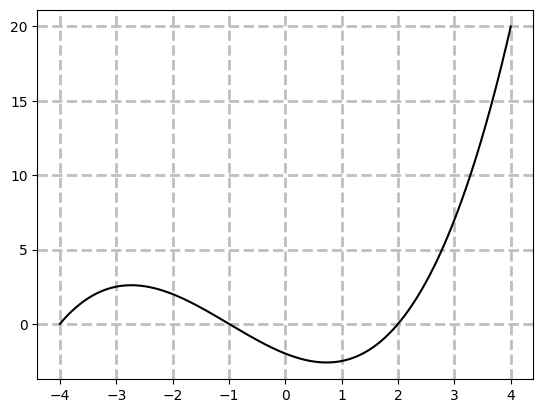

In [66]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

plt.plot(X, Y, c = 'k')
plt.grid(True, lw=2, ls='--', c='.75')
plt.show()

Adding a grid is as simple as calling the **pyplot.grid()** function with True as the argument. A grid is comprised of lines and as such, pyplot.grid() accepts line style parameters, such as linewidth, linestyle, or color. These parameters will apply to the lines used to draw the grid.

## Adding lines

When you have a very specific need in mind, the figures offered by matplotlib might not be of much help to you. All the graphics made by matplotlib consist of basic primitives. When demonstrating how to change the color of a boxplot, we mention that most matplotlib plotting functions return collections of lines and shapes. Now, we are going to demonstrate how to directly use a fundamental primitive: **lines**.

The following script will show a simple but aesthetic pattern made of independent lines:

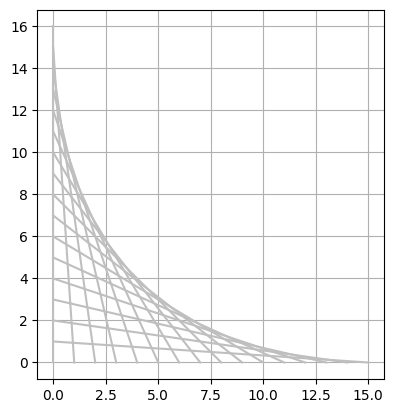

In [67]:
N = 16
for i in range(N):
    plt.gca().add_line(plt.Line2D((0, i), (N - i, 0), color='.75'))
    
plt.grid(True)
plt.axis('scaled')
plt.show()

In this script, we plot 16 independent lines. The **pyplot.Line2D()** function creates a new Line2D object. The mandatory parameters are the endpoints of the line. The optional parameters are all the parameters we have seen before for line-based figures. Thus, you can use linestyle, linewidth, marker, markersize, color, and so on.

The pyplot.Line2D() function creates the line, but the line will not be rendered unless you explicitly ask for it; this is done using **pyplot.gca().add_line()**. The **pyplot.gca()** function returns the object that is in charge of keeping track of what to render. Calling gca().add_line() simply signals that we want to render a line.

The **pyplot.axis('scaled')** function is required to ensure that the figure uses a uniform scale: the same scale as the one used on the x and y axes. This to be contrasted with the default behavior, 'tight', where matplotlib will give a different scale to the x and y axes to fit the figure as tightly as possible into the display surface. This feature will be introduced later in Working with Figures.

## Controlling tick spacing

In matplotlib, ticks are small marks on both the axes of a figure. So far, we let matplotlib handle the position of the ticks on the axes legend.

In this script, we will manipulate the gap between the ticks on the x axis:

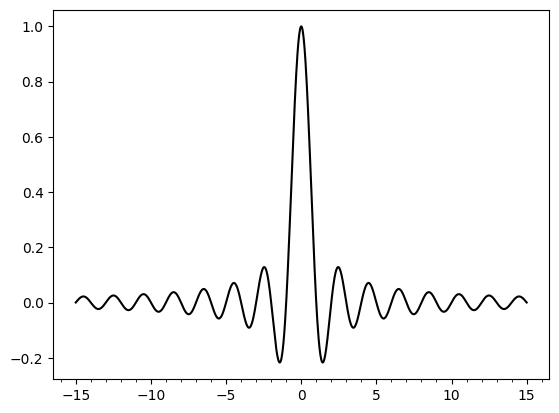

In [68]:
import matplotlib.ticker as ticker

X = np.linspace(-15, 15, 1024)
Y = np.sinc(X)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.plot(X, Y, c='k')
plt.show()

We forced the horizontal ticks to appear by steps of 5 units. Moreover, we also added small
ticks, appearing by steps of 1 unit. To do so, we perform the following steps:

1. We get an instance of the Axes object: the object that manages the axes of a figure. This is the purpose of ax = plot.axes().
2. For the x axis (ax.xaxis), we set a Locator instance for both the major and minor ticks.

If we wish to add a grid, we can take into account the minor ticks, as follows:

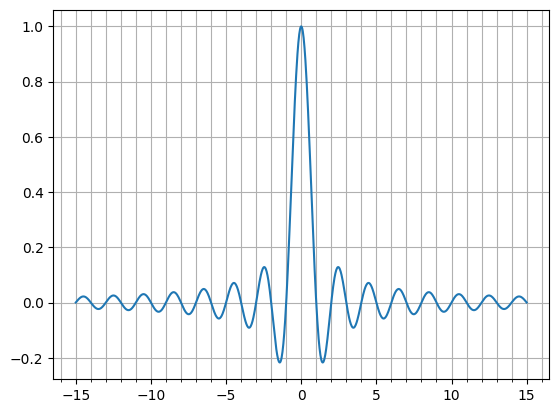

In [69]:
import matplotlib.ticker as ticker

X = np.linspace(-15, 15, 1024)
Y = np.sinc(X)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.grid(True, which='both')
plt.plot(X, Y)
plt.show()

As shown previously, we can add a grid with **pyplot.grid()**. This function takes an optional parameter, which. It can accept three values: 'minor', 'major', and 'both'. It determines at which ticks the grid should be displayed.

## Controlling tick labeling

Tick labels are coordinates in the figure space. Although it makes sense for a fair number of cases, it is not always adequate. For instance, let's imagine a bar chart that shows the median income of 10 countries. We would like to see the names of the countries under each bar, rather than the coordinates of the bars. For a time series, we would like to see dates rather than some abstract coordinate. matplotlib provides a comprehensive API precisely for this.
In this recipe, we will see how to control tick labeling.

Using the standard matplotlib ticks API, setting ticks for a bar chart (or any other kind of graphics) is done as follows:

In [70]:
import matplotlib.ticker as ticker

name_list = ('Omar', 'Serguey', 'Max', 'Zhou', 'Abidin')
value_list = np.random.randint(0, 99, size = len(name_list))
pos_list = np.arange(len(name_list))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
plt.bar(pos_list, value_list, color = '.75', align = 'center', edgecolor='black')
plt.show()

We have seen the **ticker.Locator** to generate the location of ticks. A **ticker.Formatter** object instance will generate labels for the ticks. The Formatter instance we have used here is a **FixedFormatter**, which will take the labels from a list of strings.

We then set the x axis with our Formatter instance. For this particular example, we also use a **FixedLocator** to ensure that each bar is right at the middle of one tick.

## Compositing multiple figures

If we just need to have a couple of figures in one row or one column, we can use subplots as follows:

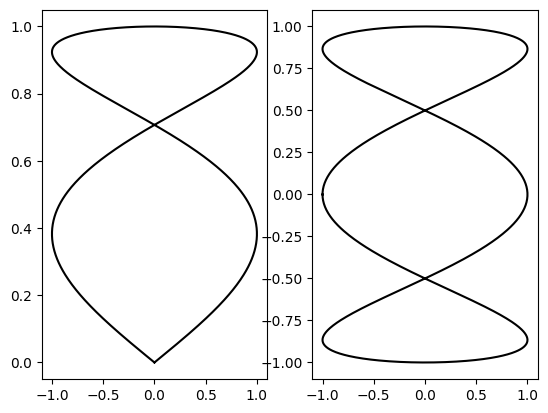

In [71]:
T = np.linspace(-np.pi, np.pi, 1024)

fig, (ax0, ax1) = plt.subplots(ncols=2)
ax0.plot(np.sin(2 * T), np.cos(0.5 * T), c = 'k')
ax1.plot(np.cos(3 * T), np.sin(T), c = 'k')
plt.show()

If you need more complex layouts, you can check **pyplot.subplot2grid()** function.

## Setting an axis range

By default, matplotlib will find the minimum and maximum of your data on both axes and use this as the range to plot your data. However, it is sometimes preferable to manually set this range, to get a better view of the data's extrema. In this recipe, we are going to see how to set an axis range.

The pyplot API provides a function to directly set the range of one axis, as follows:

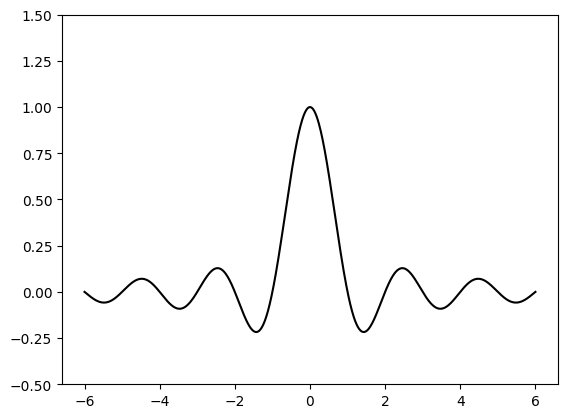

In [72]:
X = np.linspace(-6, 6, 1024)

plt.ylim(-.5, 1.5)
plt.plot(X, np.sinc(X), c = 'k')
plt.show()

The **pyplot.xlim()** and **pyplot.ylim()** parameters allow us to control the range of the x axis and y axis respectively. These parameters are the maximum and minimum values.

## Setting the aspect ratio

When preparing figures for a journal publication or a website, one might need a figure that has one specific aspect ratio. In this recipe, we are going to see how to control the aspect ratio of a figure.

The pyplot API provides a simple way to set up a custom aspect ratio, as follows:

In [73]:
X = np.linspace(-6, 6, 1024)
Y1, Y2 = np.sinc(X), np.cos(X)

plt.figure(figsize=(10.24, 2.56))
plt.plot(X, Y1, c='k', lw = 3.)
plt.plot(X, Y2, c='.75', lw = 3.)
plt.show()

We use the pyplot.figure() function, which creates a new **Figure** instance. A Figure object represents a figure as a whole. Usually, this object is created implicitly, behind the scenes. However, by creating the object explicitly, we can control various aspects of a figure, including its aspect ratio. The **figsize** parameter allows us to specify its size. In this example, we set the horizontal size as four times the vertical size, giving it a 4:1 aspect ratio.

## Generating a PNG picture file

By default, matplotlib shows a figure in a window with a rudimentary user interface. This interface allows you to save the figure to a file. Although it is a reasonable approach for prototyping, it is not convenient in several common usage cases. For instance, you might want to generate a dozen pictures to be included on an automatically generated report. You might want to generate one picture per input file as a batch processor. matplotlib allows you to directly save the figure to a picture file with great flexibility.

To get started, we are going to see how to output a figure to a PNG file. A PNG file is ideal for a bitmap output, and it is also the de-facto standard for bitmap pictures. It's a well-supported standard; it relies on a lossless compression algorithm (thus avoiding unsightly compression artifacts), and handles transparency.

We are going to use the **pyplot.savefig()** call instead of the usual **pyplot.show()** call when asking matplotlib to render the figure as follows:

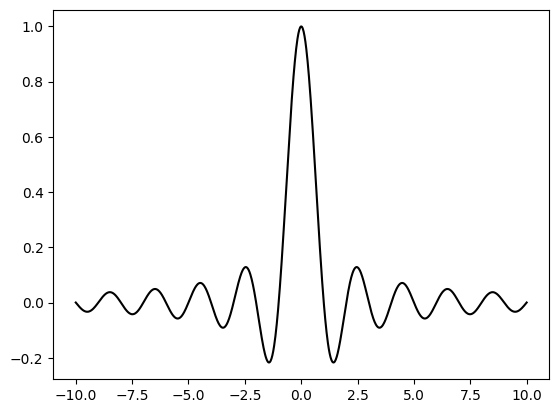

In [75]:
X = np.linspace(-10, 10, 1024)
Y = np.sinc(X)

plt.plot(X, Y, c='k')
plt.savefig('data/sinc.png')

This script, rather than showing a figure in a window with a user interface, will simply create a file named sinc.png. Its resolution will be 800 x 600 pixels, in 8-bit colors (24-bits per pixel).

The function **pyplot.savefig()** works exactly like **pyplot.show()** — it interprets all the commands issued to pyplot and produces a figure. The only difference is what is done at the end of the processing. The pyplot.show() function sends the picture data to whatever user interface library it can use, while the pyplot.savefig() function writes that data to a file. Thus, all the commands work exactly the same way, no matter what the nature of the
final output is.

The pyplot.savefig() function offers a variety of optional parameters, which we will explore in the following sections.

## Controlling the output resolution

By default, when using the output to a bitmap picture, matplotlib chooses the size and the resolution of the output for us. Depending on what the bitmap picture will be used for, we might want to choose the resolution ourselves. For instance, if a picture is to be part of a large poster, we might prefer a high resolution, or, if we want to generate a thumbnail, then the resolution would be very low. In this recipe, we will learn how to control the output resolution.

The pyplot.savefig() function provides an optional parameter to control the output resolution, as shown in the following script:

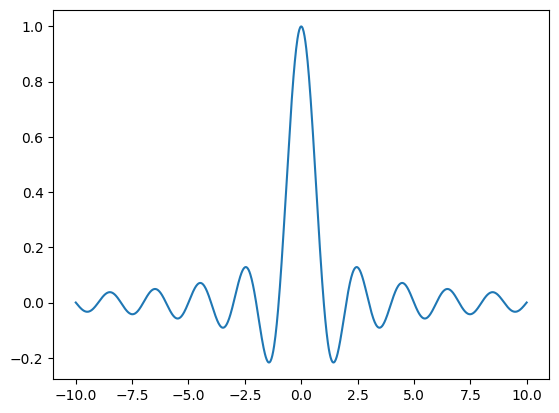

In [77]:
X = np.linspace(-10, 10, 1024)
Y = np.sinc(X)

plt.plot(X, Y)
plt.savefig('data/sinc.png', dpi=300)

The preceding script draws a curve and outputs the result to a file. Instead of the usual 800 x 600 pixels output, it will be 2400 x 1800 pixels.

The pyplot.savefig() function has an optional parameter called **dpi**. This parameter controls the resolution of the picture expressed in DPI (Dots Per Inches). For those more familiar with metric units, 1 inch equals 2.54 centimeters. This unit expresses how many dots are found in 1 inch of the actual document. A good inkjet printer will print a document with a resolution of 300 dpi. A high quality laser printer can easily print at 600 dpi. By default, matplotlib will output a figure of 8 x 6 spatial units—a 4/3 aspect ratio. In matplotlib, 1 spatial unit equals to 100 pixels. Thus, by default, matplotlib will give a picture file of 800 x 600 pixels. If we use dpi = 300, the picture size will be 8 * 300 x 6 * 300, that is, 2400 x 1800 pixels.

## Generating PDF or SVG documents

An output to a bitmap picture is not always ideal. Bitmap pictures represent pictures as an array of pixels at one given scale. Zoom in and you will get some well-known artifacts (jaggies, staircases, blur, and so on), depending on the sampling algorithm employed. Vector pictures are scale invariant; no matter at which scale you observe them, no loss of details or artifacts will show up. As such, vector pictures are desirable when composing a larger document, such as a journal article. We do not need to generate new pictures when adjusting the scale of a figure. matplotlib can output vector pictures such as PDF and SVG pictures.

The output to a PDF document is a simple affair, as shown in the following script:

In [ ]:
X = np.linspace(-10, 10, 1024)
Y = np.sinc(X)

plt.plot(X, Y)
plt.savefig('data/11/sinc.pdf')